<a href="https://colab.research.google.com/github/ormorteey/STA-250-Project/blob/main/STA_250_%5BR%5D_Computational_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages("pacman")
library(pacman)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [13]:
p_load(tidyverse, googledrive, gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


gridExtra installed



In [5]:
drive_deauth()
drive_user()
public_file = drive_get(as_id("16Z4NYVo85-BcziIoBwgOCnHvUQ59F3Fo"))
drive_download(public_file, overwrite = T)

ℹ Not logged in as any specific Google user.

File downloaded:

• HuGaDB.zip <id: 16Z4NYVo85-BcziIoBwgOCnHvUQ59F3Fo>

Saved locally as:

• HuGaDB.zip



In [8]:
unzip("HuGaDB.zip")

In [11]:
mydata = read.table("Data/HuGaDB_v1_walking_01_00.txt", header = T)
head(mydata, 3)

,acc_rf_x,acc_rf_y,acc_rf_z,gyro_rf_x,gyro_rf_y,gyro_rf_z,acc_rs_x,acc_rs_y,acc_rs_z,gyro_rs_x,⋯,gyro_ls_z,acc_lt_x,acc_lt_y,acc_lt_z,gyro_lt_x,gyro_lt_y,gyro_lt_z,EMG_r,EMG_l,act
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,-32768,-780,23984,-2983,10095,4931,-32768,-6992,-1720,-4407,⋯,-156,-10128,-8032,-14928,2160,1270,-149,121,149,1
2,-32768,-32768,32767,-3077,8437,5303,-32768,-23248,1592,-2819,⋯,507,-944,11744,-18960,1454,1545,-334,143,118,1
3,-4104,-32768,32767,670,3768,5494,-19016,-20920,-32160,1657,⋯,318,-22584,12088,-17712,553,2108,574,126,105,1


## **Plots for gait dynamic time series**

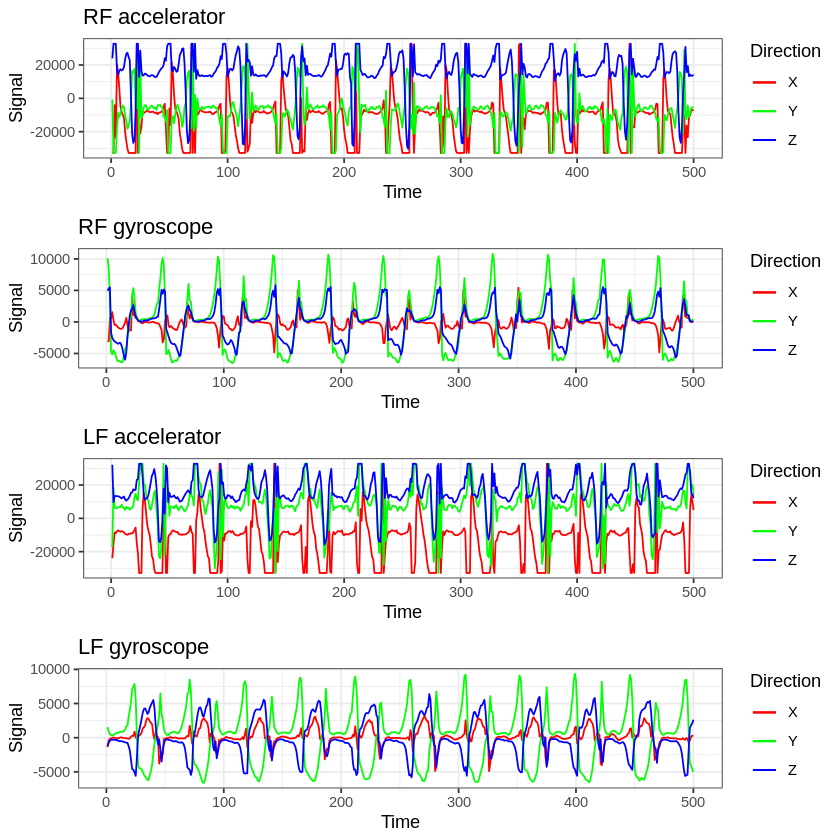

In [14]:
color_XYZ = c("X" = "red", "Y" = "green", "Z" = "blue")

# choose a chunk of the time series data
start = 1
end = 500
sampledata = mydata[start:end,] 

# plot the right foot accelerator data
p_acc_rf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = acc_rf_x, color = "X")) +
  geom_line(aes(y = acc_rf_y, color = "Y")) +
  geom_line(aes(y = acc_rf_z, color = "Z")) +
  scale_color_manual("Direction", values = color_XYZ) + 
  labs(x = "Time",
       y = "Signal",
       title = "RF accelerator") +
  theme_bw()

# plot the right foot gyroscope data
p_gyro_rf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = gyro_rf_x, color = "X")) +
  geom_line(aes(y = gyro_rf_y, color = "Y")) +
  geom_line(aes(y = gyro_rf_z, color = "Z")) +
  labs(x = "Time",
       y = "Signal",
       title = "RF gyroscope") +
  scale_color_manual("Direction", values = color_XYZ) +
  theme_bw()

# plot the left foot accelerator data
p_acc_lf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = acc_lf_x, color = "X")) +
  geom_line(aes(y = acc_lf_y, color = "Y")) +
  geom_line(aes(y = acc_lf_z, color = "Z")) +
  scale_color_manual("Direction", values = color_XYZ) + 
  labs(x = "Time",
       y = "Signal",
       title = "LF accelerator") +
  theme_bw()

# plot the leftt foot gyroscope data
p_gyro_lf = ggplot(sampledata, aes(x = start:end)) +
  geom_line(aes(y = gyro_lf_x, color = "X")) +
  geom_line(aes(y = gyro_lf_y, color = "Y")) +
  geom_line(aes(y = gyro_lf_z, color = "Z")) +
  labs(x = "Time",
       y = "Signal",
       title = "LF gyroscope") +
  scale_color_manual("Direction", values = color_XYZ) +
  theme_bw()

grid.arrange(p_acc_rf, p_gyro_rf, p_acc_lf, p_gyro_lf, ncol = 1)